## Dataset overview

In [39]:
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
from sklearn.model_selection import train_test_split

# Paths to the training and test datasets
train_data_path = '/Users/iani.kuli/Desktop/Harvard/dataset/Training'
test_data_path = '/Users/iani.kuli/Desktop/Harvard/dataset/Test'

def load_npz_files(data_path, chunk_size=100):
    files = [f for f in os.listdir(data_path) if f.endswith('.npz')]
    for i in range(0, len(files), chunk_size):
        chunk_files = files[i:i + chunk_size]
        images = []
        masks = []
        ages = []
        genders = []
        races = []
        ethnicities = []
        languages = []
        maritalstatuses = []
        for file in chunk_files:
            file_path = os.path.join(data_path, file)
            data = np.load(file_path, allow_pickle=True)
            images.append(data['slo_fundus'])
            masks.append(data['disc_cup_mask'])
            ages.append(data['age'].item())
            genders.append(data['gender'].item())
            races.append(data['race'].item())
            ethnicities.append(data['ethnicity'].item())
            languages.append(data['language'].item())
            maritalstatuses.append(data['maritalstatus'].item())
        yield images, masks, ages, genders, races, ethnicities, languages, maritalstatuses

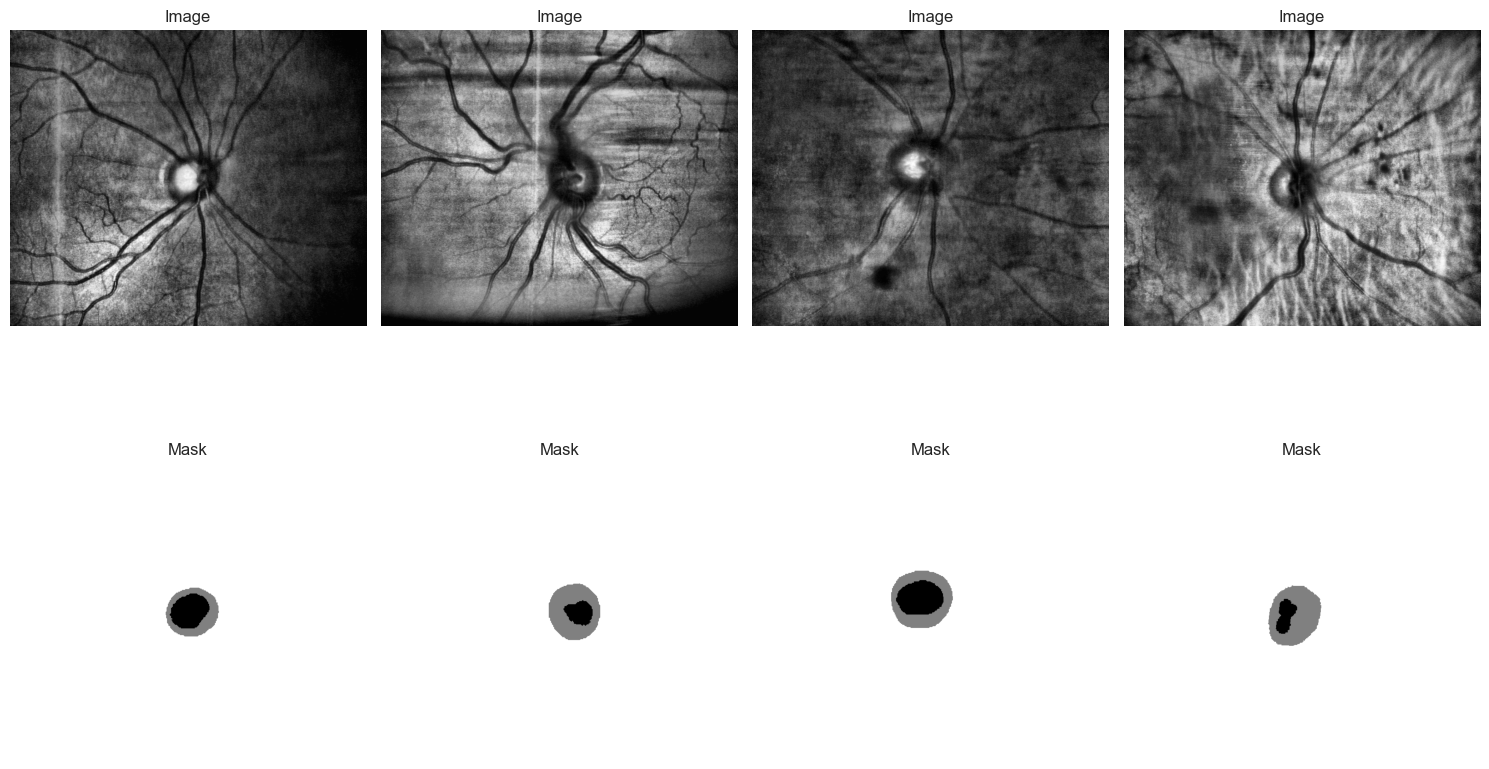

In [4]:
# Load and process training data
train_images, train_masks, train_ages, train_genders, train_races, train_ethnicities, train_languages, train_maritalstatuses = [], [], [], [], [], [], [], []
for images, masks, ages, genders, races, ethnicities, languages, maritalstatuses in load_npz_files(train_data_path):
    train_images.extend(images)
    train_masks.extend(masks)
    train_ages.extend(ages)
    train_genders.extend(genders)
    train_races.extend(races)
    train_ethnicities.extend(ethnicities)
    train_languages.extend(languages)
    train_maritalstatuses.extend(maritalstatuses)

# Load and process test data
test_images, test_masks, test_ages, test_genders, test_races, test_ethnicities, test_languages, test_maritalstatuses = [], [], [], [], [], [], [], []
for images, masks, ages, genders, races, ethnicities, languages, maritalstatuses in load_npz_files(test_data_path):
    test_images.extend(images)
    test_masks.extend(masks)
    test_ages.extend(ages)
    test_genders.extend(genders)
    test_races.extend(races)
    test_ethnicities.extend(ethnicities)
    test_languages.extend(languages)
    test_maritalstatuses.extend(maritalstatuses)
    
    
def visualize_data(images, masks, num_samples=4):
    sns.set_style("whitegrid")
    plt.figure(figsize=(15, 10))
    for i in range(num_samples):
        plt.subplot(2, num_samples, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title('Image')
        plt.axis('off')
        
        plt.subplot(2, num_samples, i + 1 + num_samples)
        plt.imshow(masks[i], cmap='gray')
        plt.title('Mask')
        plt.axis('off')
        
    plt.tight_layout()
    plt.show()

visualize_data(train_images, train_masks)

In [5]:
# Create DataFrames for the demographic data
train_df = pd.DataFrame({
    'age': train_ages,
    'gender': train_genders,
    'race': train_races,
    'ethnicity': train_ethnicities,
    'language': train_languages,
    'maritalstatus': train_maritalstatuses
})

test_df = pd.DataFrame({
    'age': test_ages,
    'gender': test_genders,
    'race': test_races,
    'ethnicity': test_ethnicities,
    'language': test_languages,
    'maritalstatus': test_maritalstatuses
})

train_df.head()

,age,gender,race,ethnicity,language,maritalstatus
0,57.05,0,2,1,0,1
1,78.25,1,2,0,0,0
2,70.73,0,2,1,0,2
3,66.70,1,2,-1,0,-1
4,56.82,0,2,0,0,0


In [6]:
test_df.head()

,age,gender,race,ethnicity,language,maritalstatus
0,56.33,0,2,0,0,1
1,71.47,1,2,0,0,0
2,46.17,1,1,0,0,1
3,29.33,1,2,0,0,0
4,21.67,0,2,0,0,1


In [7]:
len(train_df),len(test_df)

(8000, 2000)

In [20]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Descriptive Statistics for Training Data
age_mean = train_df['age'].mean()
age_median = train_df['age'].median()
age_std = train_df['age'].std()
age_min = train_df['age'].min()
age_max = train_df['age'].max()

print(f"Age - Mean: {age_mean}, Median: {age_median}, Std: {age_std}, Min: {age_min}, Max: {age_max}")

# Categorical Variables
gender_counts = train_df['gender'].value_counts()
race_counts = train_df['race'].value_counts()
ethnicity_counts = train_df['ethnicity'].value_counts()
language_counts = train_df['language'].value_counts()
maritalstatus_counts = train_df['maritalstatus'].value_counts()

print("Gender Counts:\n", gender_counts)
print("Race Counts:\n", race_counts)
print("Ethnicity Counts:\n", ethnicity_counts)
print("Language Counts:\n", language_counts)
print("Marital Status Counts:\n", maritalstatus_counts)

Age - Mean: 60.1929275, Median: 63.28, Std: 16.565658828169013, Min: 10.68, Max: 97.43
Gender Counts:
 gender
0    4685
1    3315
Name: count, dtype: int64
Race Counts:
 race
2    6087
1    1161
0     752
Name: count, dtype: int64
Ethnicity Counts:
 ethnicity
 0    7242
-1     458
 1     300
Name: count, dtype: int64
Language Counts:
 language
 0    7389
 2     409
 1     121
-1      81
Name: count, dtype: int64
Marital Status Counts:
 maritalstatus
 0    4600
 1    2175
 2     546
 3     421
-1     195
 4      63
Name: count, dtype: int64


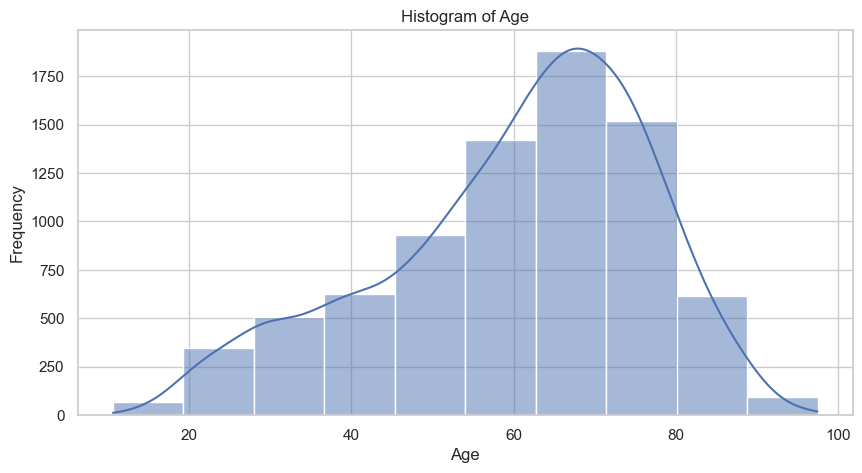

In [38]:
# Data Visualization for Training Data
sns.set(style="whitegrid")

# Quantitative Variables
plt.figure(figsize=(10, 5))
sns.histplot(train_df['age'], bins=10, kde=True)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

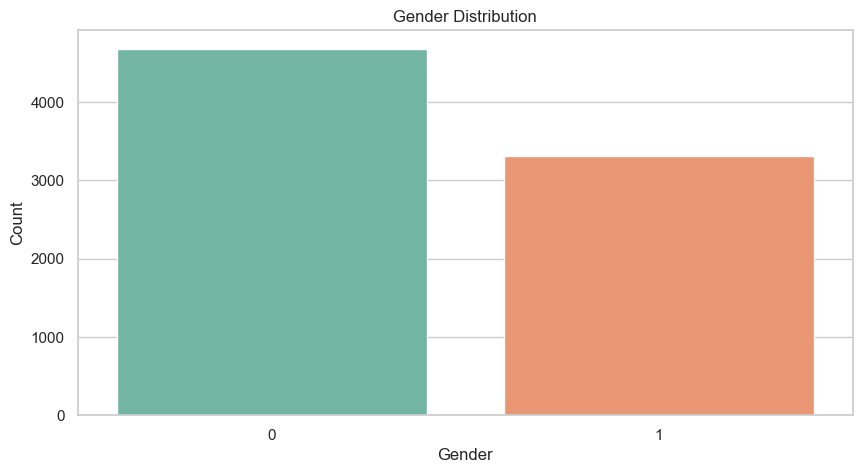

In [27]:
# Categorical Variables
plt.figure(figsize=(10, 5))
sns.countplot(x='gender', data=train_df, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

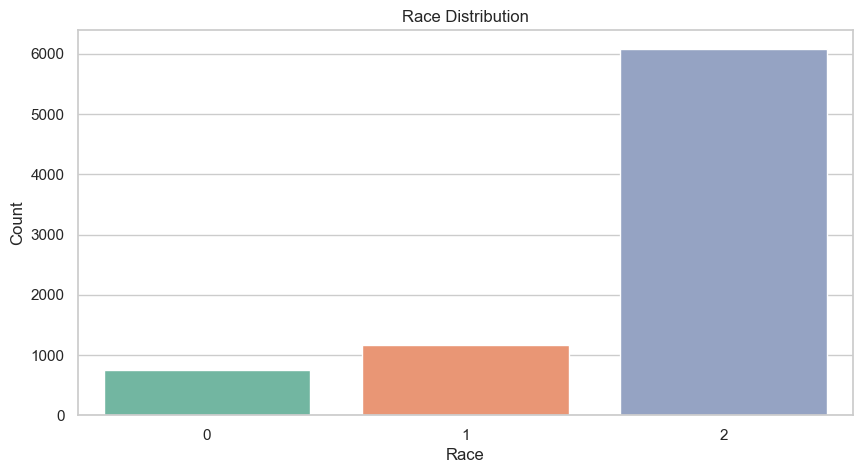

In [28]:
plt.figure(figsize=(10, 5))
sns.countplot(x='race', data=train_df, palette='Set2')
plt.title('Race Distribution')
plt.xlabel('Race')
plt.ylabel('Count')
plt.show()

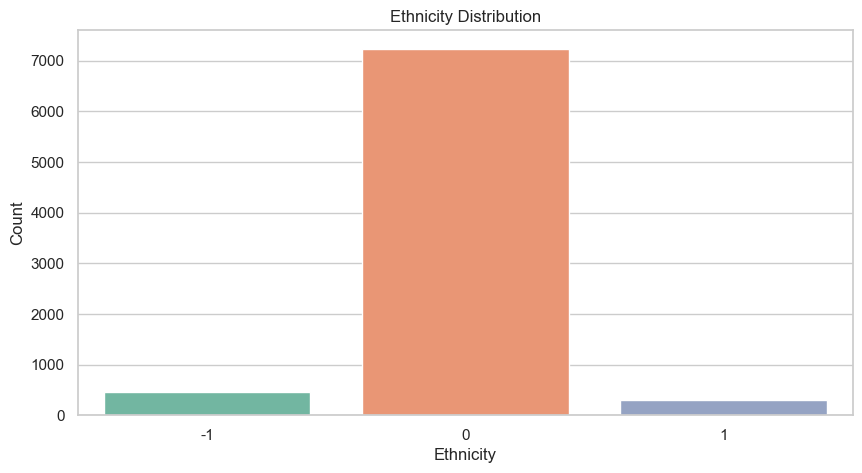

In [29]:
plt.figure(figsize=(10, 5))
sns.countplot(x='ethnicity', data=train_df, palette='Set2')
plt.title('Ethnicity Distribution')
plt.xlabel('Ethnicity')
plt.ylabel('Count')
plt.show()

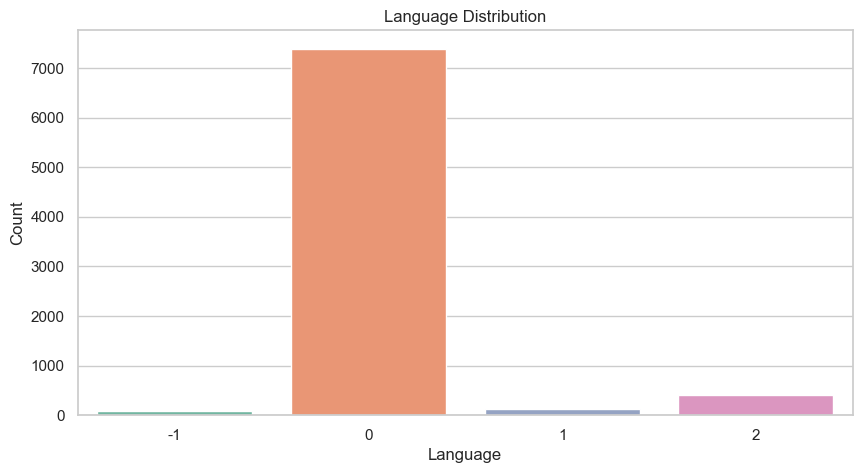

In [30]:
plt.figure(figsize=(10, 5))
sns.countplot(x='language', data=train_df, palette='Set2')
plt.title('Language Distribution')
plt.xlabel('Language')
plt.ylabel('Count')
plt.show()

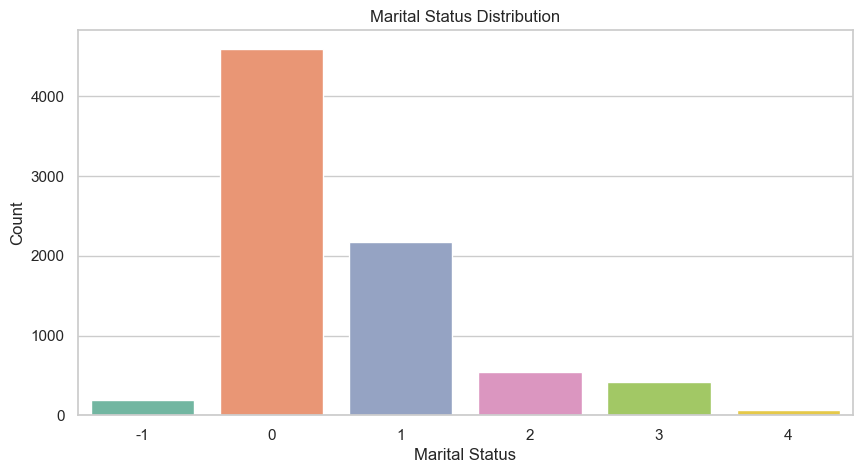

In [31]:
plt.figure(figsize=(10, 5))
sns.countplot(x='maritalstatus', data=train_df, palette='Set2')
plt.title('Marital Status Distribution')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.show()

In [42]:
# Distribution Analysis for Training Data
# Skewness and Kurtosis for 'age'
age_skewness = skew(train_df['age'])
age_kurtosis = kurtosis(train_df['age'])

print(f"Age - Skewness: {age_skewness}, Kurtosis: {age_kurtosis}")

# Mode for Categorical Variables
gender_mode = train_df['gender'].mode()[0]
race_mode = train_df['race'].mode()[0]
ethnicity_mode = train_df['ethnicity'].mode()[0]
language_mode = train_df['language'].mode()[0]
maritalstatus_mode = train_df['maritalstatus'].mode()[0]

#The most frequently in a data set
print(f"Gender Mode: {gender_mode}")
print(f"Race Mode: {race_mode}")
print(f"Ethnicity Mode: {ethnicity_mode}")
print(f"Language Mode: {language_mode}")
print(f"Marital Status Mode: {maritalstatus_mode}")

Age - Skewness: -0.5891715524101598, Kurtosis: -0.2905267091763508
Gender Mode: 0
Race Mode: 2
Ethnicity Mode: 0
Language Mode: 0
Marital Status Mode: 0


### Age Skewness: -0.5891715524101598: This indicates a slight negative skewness, meaning the distribution of ages has a longer or fatter left tail. The bulk of the age values are slightly to the right of the mean.

### Age Kurtosis: -0.2905267091763508: This indicates a slightly platykurtic distribution, meaning the age distribution is slightly flatter than a normal distribution with lighter tails.